In [1]:
# libs
import os
import pandas as pd
import requests
from dotenv import load_dotenv #pip3 install python-dotenv

# load secrets
load_dotenv()

True

In [2]:
# intialiaze api key
iex_key = os.getenv('IEX_API_KEY')

# IEX Cloud api query function to fetch historical data for stock symbol x
"""
think about scaling this function elswhere if needed.
when application expands -> can also break out into a .py file or a *class*  
"""

def get_historical_data(symbol, token):
    url = f'https://cloud.iexapis.com/stable/stock/{symbol}/chart/1y?token={iex_key}'
    response = requests.get(url)
    data = response.json() # get json response
    df = pd.DataFrame(data) # convert to dataframe
    df['date'] = pd.to_datetime(df['date']) # convert date to datetime
    df.set_index('date', inplace=True) # set date as index
    df.sort_index(inplace=True) # ensure data is sorted by date
    return df


In [3]:
# get historical data for Palantir (PLTR)
df_pltr = get_historical_data('PLTR', iex_key)

print(df_pltr.head())

            close   high    low  open   priceDate symbol    volume  \
date                                                                 
2022-11-07   7.02  7.850  6.890  7.78  2022-11-07   PLTR  99332839   
2022-11-08   7.21  7.420  6.910  7.08  2022-11-08   PLTR  56353934   
2022-11-09   6.98  7.185  6.950  7.12  2022-11-09   PLTR  42517300   
2022-11-10   7.64  7.970  7.430  7.46  2022-11-10   PLTR  58579775   
2022-11-11   8.41  8.420  7.375  7.48  2022-11-11   PLTR  55324135   

                           id   key subkey  ...   uLow   uVolume  fOpen  \
date                                        ...                           
2022-11-07  HISTORICAL_PRICES  PLTR         ...  6.890  99332839   7.78   
2022-11-08  HISTORICAL_PRICES  PLTR         ...  6.910  56353934   7.08   
2022-11-09  HISTORICAL_PRICES  PLTR         ...  6.950  42517300   7.12   
2022-11-10  HISTORICAL_PRICES  PLTR         ...  7.430  58579775   7.46   
2022-11-11  HISTORICAL_PRICES  PLTR         ...  7.375  553

In [4]:
# look at the data 
"""
the iex cloud api must have a default limit, but 2022 is perfect i don't want more than that
"""

# df_pltr
df_pltr.head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
date,,,,,,,,,,,,,,,,,,,,,
2022-11-07,7.02,7.850,6.890,7.78,2022-11-07,PLTR,99332839,HISTORICAL_PRICES,PLTR,,...,6.890,99332839,7.78,7.02,7.850,6.890,99332839,"Nov 7, 22",0.00,0.0000
2022-11-08,7.21,7.420,6.910,7.08,2022-11-08,PLTR,56353934,HISTORICAL_PRICES,PLTR,,...,6.910,56353934,7.08,7.21,7.420,6.910,56353934,"Nov 8, 22",0.19,0.0271
2022-11-09,6.98,7.185,6.950,7.12,2022-11-09,PLTR,42517300,HISTORICAL_PRICES,PLTR,,...,6.950,42517300,7.12,6.98,7.185,6.950,42517300,"Nov 9, 22",-0.23,-0.0319
2022-11-10,7.64,7.970,7.430,7.46,2022-11-10,PLTR,58579775,HISTORICAL_PRICES,PLTR,,...,7.430,58579775,7.46,7.64,7.970,7.430,58579775,"Nov 10, 22",0.66,0.0946
2022-11-11,8.41,8.420,7.375,7.48,2022-11-11,PLTR,55324135,HISTORICAL_PRICES,PLTR,,...,7.375,55324135,7.48,8.41,8.420,7.375,55324135,"Nov 11, 22",0.77,0.1008


In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

In [9]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


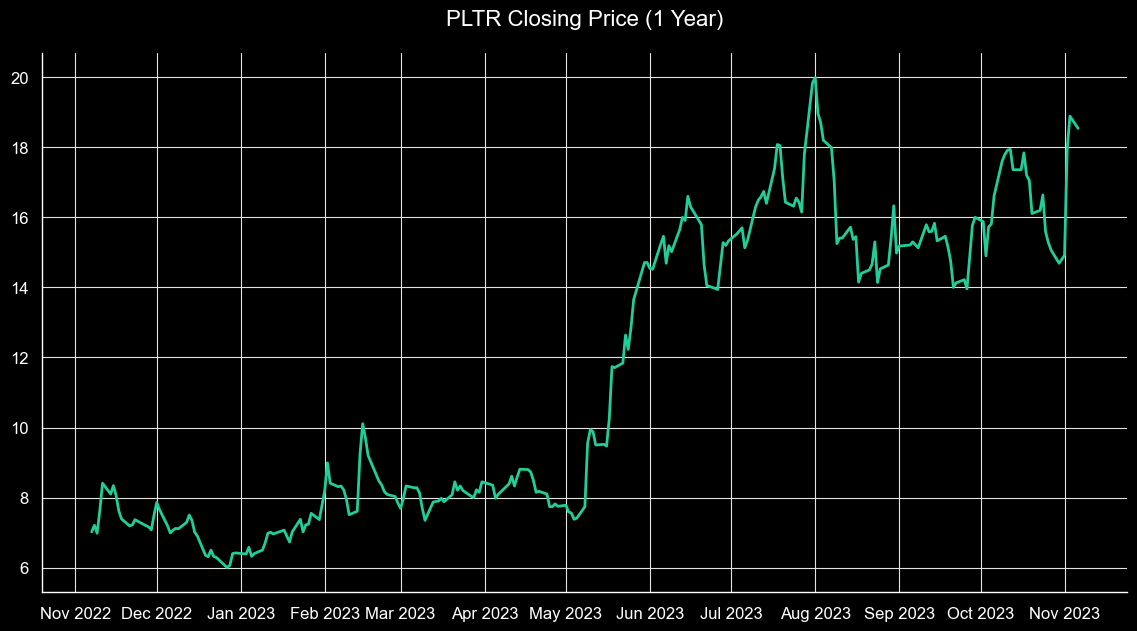

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import pandas as pd

# Assuming df_pltr is defined in your environment and has an index of dates and a 'close' column

def plot_chart():
    # Use seaborn style for a clean look
    plt.style.use('dark_background')
    
    # Set the colors for the plot
    line_color = '#ffffff'  # white (neutral)
    grid_color = '#e3e3e3'
    
    # Create the figure and the axes
    fig, ax = plt.subplots(figsize=(14, 7))

    # Plot the closing price data
    ax.plot(df_pltr.index, df_pltr['close'], color=line_color, linewidth=2)

    # Customize the date formatting on the x-axis
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

    # Use a fixed number of bins for the y-axis to keep it clean
    ax.yaxis.set_major_locator(MaxNLocator(nbins=8))
    
    # Customize the grid and spines
    ax.grid(True, color=grid_color)
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Customize the tick parameters
    ax.tick_params(axis='x', labelsize=12, pad=10)
    ax.tick_params(axis='y', labelsize=12, pad=10)
    
    # Set the title of the plot
    ax.set_title('PLTR Closing Price (1 Year)', fontsize=16, pad=20)

    # Show the plot
    plt.show()

# Call the plot function to display the chart
plot_chart()


In [8]:
import seaborn as sns
sns.axes_style()


{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': 'white',
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>,
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}